In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [15]:
ls

knife3/  pistol3/


In [29]:
cd/gdrive/MyDrive/Knife vs pistol Classification/

/gdrive/MyDrive/Knife vs pistol Classification


In [30]:
ls

Knife/  Pistol/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [24]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=30
CHANNELS=3

In [31]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Knife vs pistol Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 185 files belonging to 2 classes.


In [32]:
class_names = dataset.class_names
class_names

['Knife', 'Pistol']

In [33]:
len(dataset)

3

In [34]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[130.17188   76.171875  48.171875]
  [132.51562   78.515625  50.515625]
  [134.85938   80.859375  52.859375]
  ...
  [ 81.        47.        38.      ]
  [ 81.        47.        38.      ]
  [ 81.        47.        38.      ]]

 [[130.17188   76.171875  48.171875]
  [132.51562   78.515625  50.515625]
  [134.85938   80.859375  52.859375]
  ...
  [ 81.20813   47.20813   38.20813 ]
  [ 81.        47.        38.      ]
  [ 81.        47.        38.      ]]

 [[130.17188   76.171875  48.171875]
  [132.51562   78.515625  50.515625]
  [134.85938   80.859375  52.859375]
  ...
  [ 81.50989   47.509888  38.509888]
  [ 81.140625  47.140625  38.140625]
  [ 81.012085  47.012085  38.012085]]

 ...

 [[107.140625  60.140625  40.140625]
  [107.10437   60.10437   40.10437 ]
  [107.        60.        40.      ]
  ...
  [ 87.57031   44.        32.71875 ]
  [ 89.484375  44.        31.      ]
  [ 90.12854   43.87146   29.171875]]

 [[107.        60.        40.      ]
  [107. 

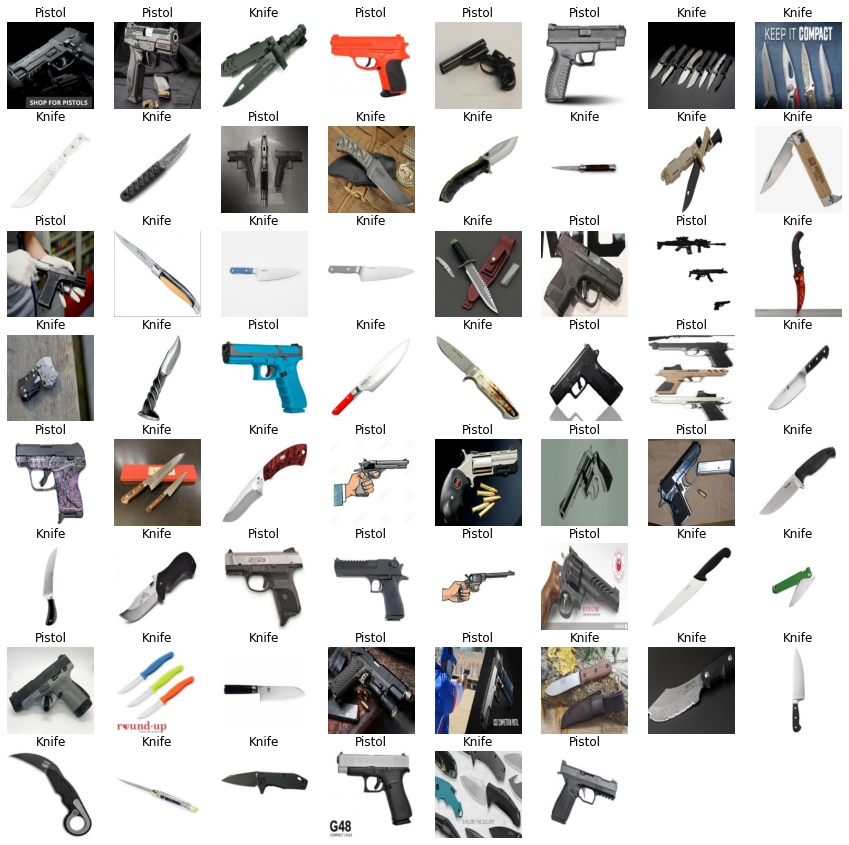

In [36]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [37]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [38]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [39]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [40]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [41]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [44]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
2/2 [==============================] - 14s 6s/step - loss: 2.0498 - accuracy: 0.2097
Epoch 2/30
2/2 [==============================] - 12s 6s/step - loss: 1.1312 - accuracy: 0.4677
Epoch 3/30
2/2 [==============================] - 12s 6s/step - loss: 0.9545 - accuracy: 0.4597
Epoch 4/30
2/2 [==============================] - 12s 6s/step - loss: 1.1986 - accuracy: 0.4677
Epoch 5/30
2/2 [==============================] - 12s 6s/step - loss: 0.7149 - accuracy: 0.5565
Epoch 6/30
2/2 [==============================] - 12s 6s/step - loss: 0.7579 - accuracy: 0.5323
Epoch 7/30
2/2 [==============================] - 12s 6s/step - loss: 0.7527 - accuracy: 0.5323
Epoch 8/30
2/2 [==============================] - 12s 6s/step - loss: 0.7031 - accuracy: 0.5242
Epoch 9/30
2/2 [==============================] - 12s 6s/step - loss: 0.7199 - accuracy: 0.5323
Epoch 10/30
2/2 [==============================] - 12s 6s/step - loss: 0.7331 - accuracy: 0.4758
Epoch 11/30
2/2 [======================

In [45]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.5985 - accuracy: 0.6885


[0.5984959006309509, 0.688524603843689]

In [46]:
acc = history.history['accuracy']
loss = history.history['loss']

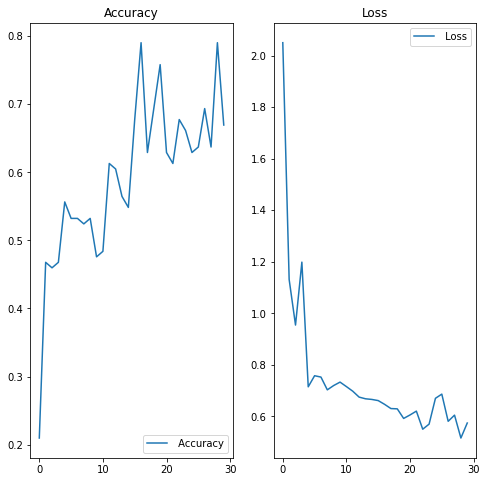

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

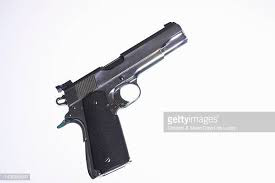

In [48]:
image_path = "/gdrive/My Drive/170.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [49]:
pred = model.predict(scaled_img)

In [50]:
output = class_names[np.argmax(pred)]

In [51]:
output

'Pistol'

In [52]:
model.save("Knife vs pistol Classification.h5")